# Explore and Plot the ATL08 data
Plot the ATL08 terrain and canopy data for various ArcticDEM strips

In [1]:
%matplotlib inline

In [2]:
import os

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (15, 8), 'font.size': 10})

# from shapely.geometry import Polygon, Point
import hvplot
import hvplot.pandas
import geoviews as gv

In [3]:
'''
V:\icesat2\rema\region_01_subantarctic_islands
W:\icesat2\rema\region_19_victoria_land\WV02_20181125_1030010087975700_1030010088694700_2m_lsf
W:\icesat2\rema\region_21_mbl_north\WV03_20181221_1040010045249300_1040010047586D00_2m_lsf
W:/icesat2/rema/region_24_ctam/W1W1_20190213_102001008107AD00_1020010081B45300_2m_lsf
D:\icesat2\rema\region_03_peninsula_south\W3W3_20190415_104001004A5F0500_104001004BC25200_2m_lsf

D:\icesat2\EarthDEM\region_31_alaska_south-x\WV03_20190705_104001004E70E200_104001004D3F5400_2m_lsf
'''

region = 'region_31_alaska_south'#'region_34_alaska_north'#'region_31_alaska_south'#'region_19_victoria_land' #'region_03_peninsula_south'
# folder = f'W:/icesat2/rema/{region}'
# folder = f'D:/icesat2/EarthDEM/{region}'
folder = f'/fs/byo/howat-data5/icesat2/EarthDEM/{region}'
strips = os.listdir(folder)
len(strips)

951

In [4]:
fig_folder = '/home/yadav.111/figs_icesat'
fig_folder

'/home/yadav.111/figs_icesat'

In [5]:
len(strips)

951

In [6]:
# For region 31: strip indices: -31, 301, 402
# interesting: 880
strip = strips[0]

In [7]:
# strip = 'W1W1_20190208_10200100827B7600_1020010082EBD500_2m_lsf'#'W2W3_20190313_103001008F927000_104001004BC46B00_2m_lsf'
# icesat2_path = f'{folder}/{strip}'
icesat2_path = 'test_data'
# os.listdir(icesat2_path)
# outline = gpd.read_file('D:/wspace/icesat2/urmia/outline.shp')
# outline = gpd.read_file('D:/wspace/icesat2/tanana/outline.shp')
# icesat2_path = 'D:/wspace/icesat2/alaska3a'
# icesat2_path = f'/fs/project/howat.4/icesat2/greenland_ATL06'
files = os.listdir(f'{icesat2_path}')
# outline = gpd.read_file(f'{icesat2_path}/strip_outline.shp')
# outline.plot(column='seg_id', alpha=.5), plt.title(f'{strip}');

hdf_files = [f for f in files if f.endswith('.h5') and 'ATL08' in f]
shp_files = [f for f in files if f.endswith('.shp') and 'ATL08' in f]
csv_files = [f for f in files if f.endswith('.csv') and 'ATL08' in f]
# To pick the largest granule for visualization only
sz_list = [os.path.getsize(f'{icesat2_path}/{hdf}') for hdf in hdf_files]
idx = sz_list.index(max(sz_list)) #largest index
print('No of shp files',len(shp_files), len(hdf_files))
# print(outline.area)

fname = shp_files[idx].split('.shp')[0]

# Load ATL08 parsed data
df = pd.read_csv(f'{icesat2_path}/{fname}.csv', parse_dates=True)
gdf = gpd.read_file(f'{icesat2_path}/{fname}.shp', parse_dates=True)
# Pick only the good quality data [verify if zero or one means good]
# df = df[df.q_flag==0]
# gdf = gdf[gdf.q_flag==0]

gtls = list(df.strip.unique())
print(len(df), gtls)
# gv.tile_sources.ESRI * gdf.hvplot.points(geo=True, color='strip', alpha=0.7, width=500, height=700, hover=['strip', 'h_te_media'])

No of shp files 7 7
3584 ['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']


In [9]:
gtl = gtls[0]
base = gv.tile_sources.ESRI
gtracks = gdf.hvplot.points(geo=True, color='strip', alpha=0.7, width=500, height=700, hover=['strip', 'h_te_media'])
terrain_scatter = df[df.strip==gtl].hvplot(y='lat', x='h_te_min', kind='scatter', width=350, height=650, color='brown', s=20, alpha=.9).relabel('terrain') # by='strip', 
canopy_scatter = df[df.strip==gtl].hvplot(y='lat', x='h_max_canopy_abs', kind='scatter', width=350, height=650, color='green', s=10, alpha=.9, title=f'Elevation ({gtl})', xlabel='meters').relabel('canopy')
fig1 = (base*gtracks + terrain_scatter*canopy_scatter).cols(2)
# fig1 = base*gtracks + terrain_scatter*canopy_scatter
# hvplot.save(fig1, f'{fig_folder}/{fname}.png')
fig1

:Layout
   .Overlay.I  :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [Longitude,Latitude]   (strip)
   .Overlay.II :Overlay
      .Scatter.Terrain :Scatter   [h_te_min]   (lat)
      .Scatter.Canopy  :Scatter   [h_max_canopy_abs]   (lat)

In [169]:
# Detour: To save above figure
# hvplot.save(fig1, f'{fig_folder}/{fname}.png')


In [184]:
# df[df.strip==gtl].hvplot.area(x='lat', y=['h_te_min', 'h_max_canopy_abs'], alpha=.5)


In [8]:
dir_prefix = '/fs/project/howat.4' #/REMA/region_20_ross_shelf
dem_folder = f'{dir_prefix}/EarthDEM/{region}/strips_unf/2m/{strip}'
tifs = [tif for tif in os.listdir(dem_folder) if tif.endswith('.tif')]
tifs

['W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg2_dem.tif',
 'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg2_ortho.tif',
 'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg4_dem.tif',
 'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg1_dem.tif',
 'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg3_dem.tif',
 'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg4_ortho.tif',
 'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg1_ortho.tif',
 'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg3_ortho.tif',
 'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg2_dem_10m.tif',
 'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg4_dem_10m.tif',
 'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg1_dem_10m.tif',
 'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg2_dem_browse.tif',
 'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg3_dem_10m.tif',
 'W3W3_20190215_10400100496ADD00_

In [9]:
[tif for tif in os.listdir(dem_folder) if tif.endswith('_dem.tif')]

['W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg2_dem.tif',
 'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg4_dem.tif',
 'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg1_dem.tif',
 'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg3_dem.tif']

In [10]:
# Can have one or more DEMs depending on how it was produced
dem_tif = [tif for tif in os.listdir(dem_folder) if tif.endswith('_dem.tif')]
ortho_tif = [tif for tif in os.listdir(dem_folder) if tif.endswith('_ortho.tif')][0]
print(dem_tif)
dem_tif = dem_tif[0] #Choose one DEM (or better find a way to merge; but this will also significantly increase the size of data)
dem_tif

['W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg2_dem.tif', 'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg4_dem.tif', 'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg1_dem.tif', 'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg3_dem.tif']


'W3W3_20190215_10400100496ADD00_1040010049D34D00_2m_lsf_seg2_dem.tif'

In [11]:
import georasters as grs
# Get the DEM
dem = grs.from_file(f'{dem_folder}/{dem_tif}')
def getPixVal(geom):
    #dem.map_pixel(x, y)
    coords = geom.coords[0]
    x, y = coords
    return(dem.map_pixel(x, y))

In [12]:
proj4 = '+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs' #arcticDEM
# gdf = gdf.to_crs({'init': 'epsg:4326'}) #change to lat/longitude
gdf1 = gdf.to_crs(proj4) #Without projecting to same crs as DEM, cant extract elevation from dEM

gdf1['dem'] = gdf1.geometry.apply(getPixVal)
# gdf = gdf.iloc[6:-10]

In [14]:
gdf1['t_dif'] = gdf1.h_te_min-gdf1.dem

In [18]:
gdf1['c_dif'] = gdf1.h_max_ca_1-gdf1.dem

In [19]:
gdf1 = gdf1.to_crs({'init': 'epsg:4326'})


In [20]:
gdf1['lon'] = gdf1.geometry.x
gdf1['lat'] = gdf1.geometry.y

In [21]:
# These are edge of DEMs so basically no data
gdf2 = gdf1[gdf1.dem!=0] 

In [23]:
#Make dataframe for plotting using hvplot
df2 = pd.DataFrame(gdf1)

In [49]:
#.relabel('Elevation Difference') #title='Elevation Difference between ATL06 and REMA'
t = df2[df2.strip==gtl].hvplot(x='lon', y='t_dif', kind='scatter', height=200, width=700, s=15,  ylim=(-25,10), ylabel='meter', xlabel='Longitude')
t

:Scatter   [lon]   (t_dif)

In [50]:
df2[df2.strip==gtl].mean()

lon          -149.693698
lat            61.265521
layer_flag      0.300000
h_te_best_     86.164642
h_te_inter     86.202804
h_te_max       87.894986
h_te_mean      86.078047
h_te_media     86.044426
h_te_min       84.610973
h_te_mode      86.030001
h_te_skew       0.123582
h_te_std        0.887065
h_te_uncer      0.586762
n_te_photo    169.386667
terrain_sl      0.005500
canopy_fla      1.000000
canopy_ope      3.904553
canopy_rh_      1.560000
centroid_h     84.171537
h_canopy       13.186167
h_canopy_a     97.156872
h_canopy_q      6.382065
h_canopy_u      1.026608
h_dif_cano      9.223200
h_max_cano     13.653344
h_max_ca_1     97.709903
h_mean_can      4.963053
h_mean_c_1     88.617465
h_median_c      3.962967
h_median_1     88.054766
h_min_cano      0.578735
h_min_ca_1     82.065763
landsat_fl      0.000000
landsat_pe     43.381333
n_ca_photo     36.020000
n_toc_phot      3.680000
toc_roughn      1.091082
dem            83.161092
t_dif           1.449881
c_dif          12.569067


In [41]:
c = df2[df2.strip==gtl].hvplot(x='lon', y='c_dif', kind='scatter', height=200, width=700, s=15,  ylim=(-30,40), ylabel='meter', xlabel='Longitude')

In [42]:
t*c

:Overlay
   .Scatter.I  :Scatter   [lon]   (t_dif)
   .Scatter.II :Scatter   [lon]   (c_dif)

:Scatter   [lon]   (t_dif)

In [32]:
df2[df2.strip==gtl][['t_dif', 'c_dif']].mean()

t_dif     1.449881
c_dif    12.569067
dtype: float64

In [24]:
df2

lon        lat                        t_dt  layer_flag  \
0   -149.616730  61.333427  2019-02-01 08:33:48.861000           0   
1   -149.616913  61.332535  2019-02-01 08:33:48.876000           0   
2   -149.617111  61.331642  2019-02-01 08:33:48.890000           0   
3   -149.617325  61.330750  2019-02-01 08:33:48.904000           0   
4   -149.617508  61.329853  2019-02-01 08:33:48.918000           0   
..          ...        ...                         ...         ...   
886 -149.766357  61.209660  2019-02-01 08:33:51.224000           1   
887 -149.766541  61.208767  2019-02-01 08:33:51.238000           1   
888 -149.766739  61.207874  2019-02-01 08:33:51.252000           1   
889 -149.766922  61.206982  2019-02-01 08:33:51.267000           1   
890 -149.767120  61.206085  2019-02-01 08:33:51.281000           1   

     h_te_best_  h_te_inter   h_te_max  h_te_mean  h_te_media   h_te_min  ...  \
0     86.747398   86.654633  90.834778  86.801086   87.138290  83.604851  ...   
1     84.720161   84.732361  88.342384  85.090073   84.815842  83.540092  ...   
2     94.081146   94.093422  96.852615  93.961166   94.401794  88.006439  ...   
3     96.519707   96.551636  97.106277  96.511833   96.525299  95.923386  ...   
4     92.758324   92.765289  96.956505  93.293304   92.650551  91.761917  ...   
..          ...         ...        ...        ...         ...        ...  ...   
886   77.003403   77.257561  78.043709  77.266853   77.246841  76.653221  ...   
887   75.999077   76.009514  77.256905  76.239838   76.112350  75.534309  ...   
888   75.511009   75.517403  75.935318  75.380707   75.324013  74.891937  ...   
889   75.224648   75.221970  76.000687  75.122955   75.183754  74.250999  ...   
890   74.931526   74.935501  75.308121  74.894325   74.904160  74.479294  ...   

     landsat_fl  landsat_pe  n_ca_photo  n_toc_phot  toc_roughn  strip  \
0             0   52.599998         185          29    0.946249   gt1l   
1             0   58.200001         201          19    1.614873   gt1l   
2             0   59.599998         297          59    1.170905   gt1l   
3             0   54.200001         129          47    0.968227   gt1l   
4             0   52.000000         305          10    0.774678   gt1l   
..          ...         ...         ...         ...         ...    ...   
886           0   11.000000          39          15    0.521647   gt3r   
887           0   14.400000          22          93    1.140597   gt3r   
888           0   18.600000          22          43    0.482201   gt3r   
889           0   20.600000          26          36    1.379548   gt3r   
890           0   12.000000          12          77    0.580708   gt3r   

                        geometry         dem      t_dif      c_dif  
0    POINT (-149.61673 61.33343)   96.327957 -12.723106  10.969971  
1    POINT (-149.61691 61.33253)  102.655983 -19.115891   2.007805  
2    POINT (-149.61711 61.33164)   98.215950 -10.209511  17.185989  
3    POINT (-149.61732 61.33075)   99.888161  -3.964775  15.868500  
4    POINT (-149.61751 61.32985)   94.960945  -3.199028  18.950485  
..                           ...         ...        ...        ...  
886  POINT (-149.76636 61.20966)    0.000000  76.653221  85.327431  
887  POINT (-149.76654 61.20877)    0.000000  75.534309  82.160316  
888  POINT (-149.76674 61.20787)    0.000000  74.891937  77.838974  
889  POINT (-149.76692 61.20698)    0.000000  74.250999  79.133339  
890  POINT (-149.76712 61.20609)    0.000000  74.479294  77.019897  

[891 rows x 43 columns]

In [14]:
# df[df.strip==gtls[0]].h_te_median.plot()

In [52]:
# base * strips

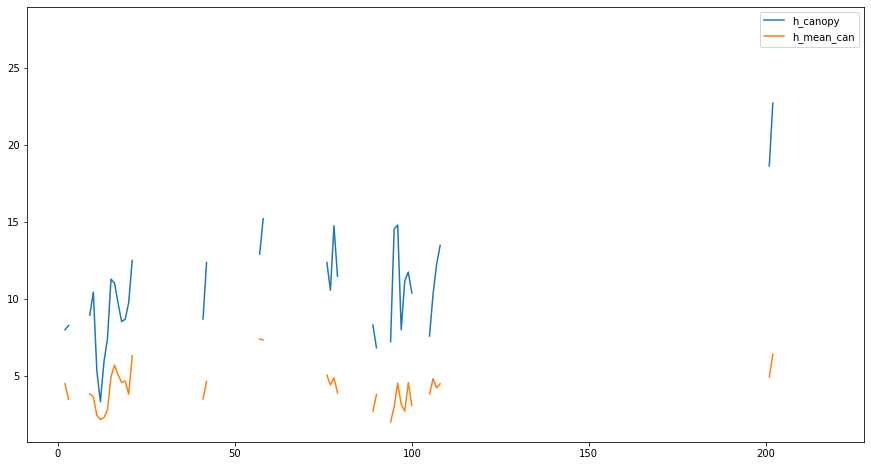

In [49]:
# gdf.h_te_media.plot()
gdf[['h_canopy', 'h_mean_can']].plot(); #error in plotting if no numeric data; ie for areas with no vegetation

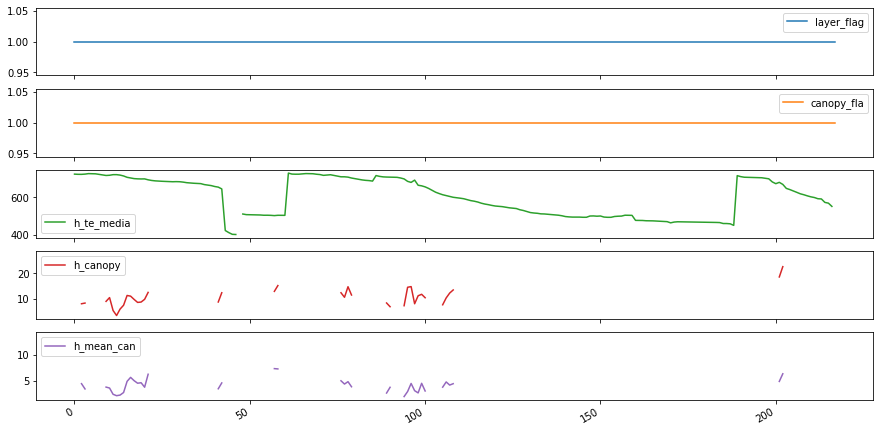

In [50]:
gdf[['layer_flag','canopy_fla', 'h_te_media', 'h_canopy', 'h_mean_can']].plot(subplots=True);

In [51]:
gdf.columns

Index(['lon', 'lat', 't_dt', 'layer_flag', 'h_te_best_', 'h_te_inter',
       'h_te_max', 'h_te_mean', 'h_te_media', 'h_te_min', 'h_te_mode',
       'h_te_skew', 'h_te_std', 'h_te_uncer', 'n_te_photo', 'terrain_sl',
       'canopy_fla', 'canopy_ope', 'canopy_rh_', 'centroid_h', 'h_canopy',
       'h_canopy_a', 'h_canopy_q', 'h_canopy_u', 'h_dif_cano', 'h_max_cano',
       'h_max_ca_1', 'h_mean_can', 'h_mean_c_1', 'h_median_c', 'h_median_1',
       'h_min_cano', 'h_min_ca_1', 'landsat_fl', 'landsat_pe', 'n_ca_photo',
       'n_toc_phot', 'toc_roughn', 'strip', 'geometry'],
      dtype='object')

1    218
Name: layer_flag, dtype: int64


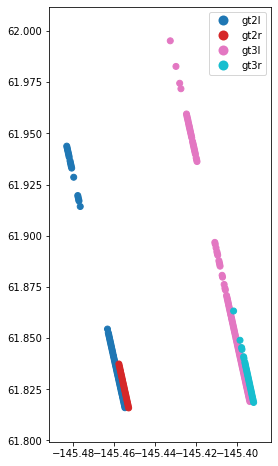

In [52]:
print(gdf.layer_flag.value_counts())
# print(gdf.t_dt.min())
# gdf.head(2)
gdf.plot(column='strip', legend=True)

In [53]:
# gv.tile_sources.ESRI * gdf.hvplot(geo=True, color='strip', width=500, height=800, alpha=.5)

In [54]:
# gv.tile_sources.ESRI * gdf.hvplot(geo=True, color='h_te_media', width=500, height=800, alpha=.5, cmap='rainbow')

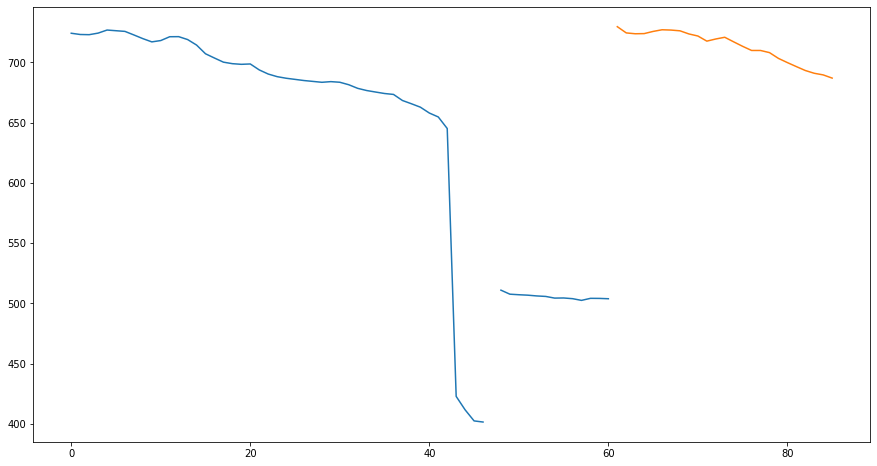

In [55]:
gdf[gdf.strip=='gt2l'].h_te_media.plot()
gdf[gdf.strip=='gt2r'].h_te_media.plot()

In [56]:
# gdf.h_te_media.plot();

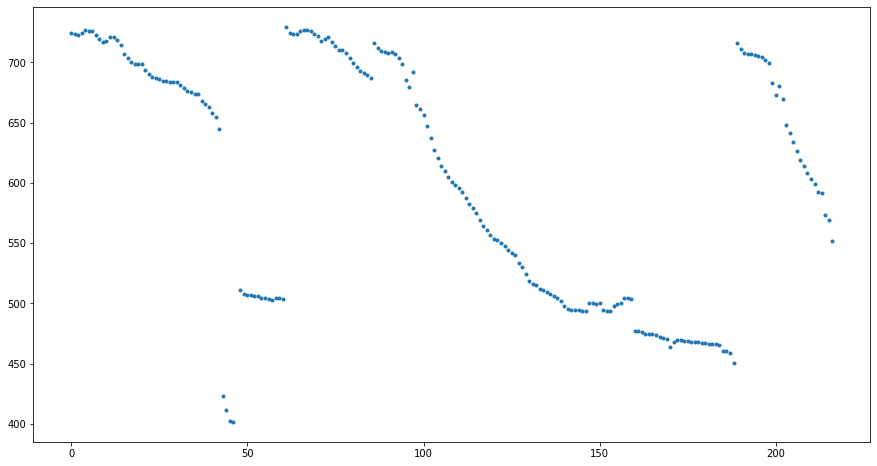

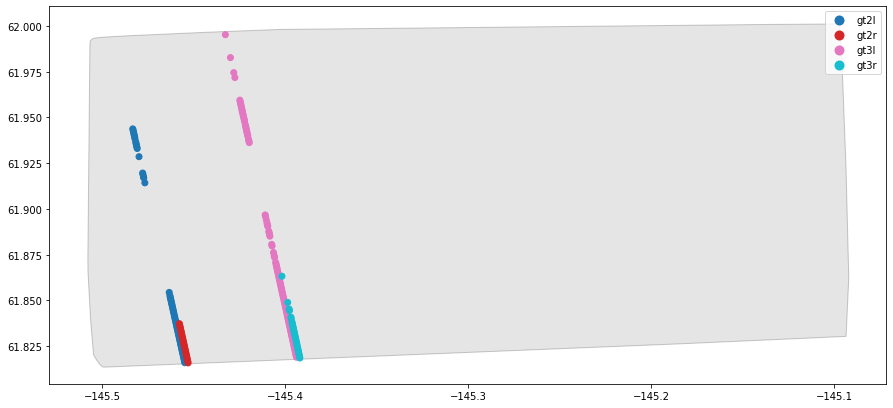

In [57]:
gdf[gdf.layer_flag==1].h_te_media.plot(style='.')
# gdf[gdf.layer_flag==0].h_te_media.plot(style='o', alpha=.6)

ax = outline.plot(edgecolor='k', facecolor='gray', alpha=.2)
gdf.plot(column='strip', legend=True, ax=ax);

In [58]:
# gdf['lat'] = gdf.geometry.apply(lambda x:x.y)

In [59]:
gdf.crs

{'init': 'epsg:4326'}

In [62]:
df.columns

Index(['lon', 'lat', 't_dt', 'layer_flag', 'h_te_best_fit', 'h_te_interp',
       'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode',
       'h_te_skew', 'h_te_std', 'h_te_uncertainty', 'n_te_photons',
       'terrain_slope', 'canopy_flag', 'canopy_openness', 'canopy_rh_conf',
       'centroid_height', 'h_canopy', 'h_canopy_abs', 'h_canopy_quad',
       'h_canopy_uncertainty', 'h_dif_canopy', 'h_max_canopy',
       'h_max_canopy_abs', 'h_mean_canopy', 'h_mean_canopy_abs',
       'h_median_canopy', 'h_median_canopy_abs', 'h_min_canopy',
       'h_min_canopy_abs', 'landsat_flag', 'landsat_perc', 'n_ca_photons',
       'n_toc_photons', 'toc_roughness', 'strip'],
      dtype='object')

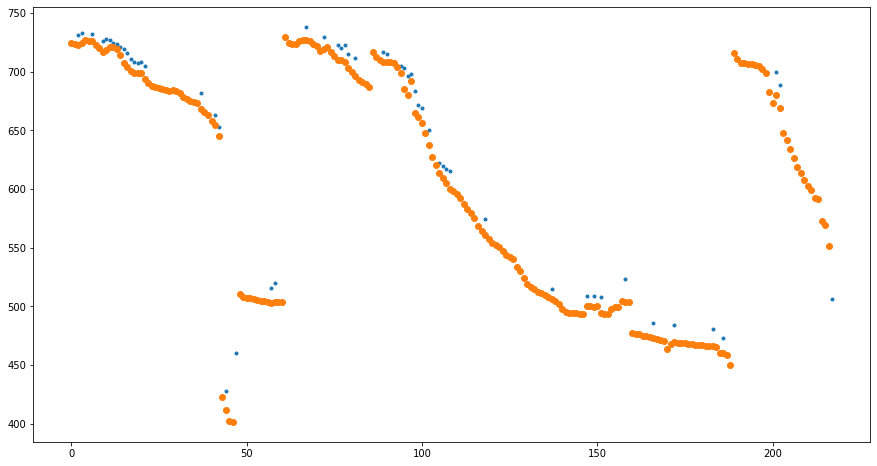

In [66]:
# Error in Canopy-free granules (TypeError: no numeric data to plot)
df.h_canopy_abs.plot(style='.')
df.h_te_median.plot(style='o');

In [67]:
dfx = gdf.drop(['geometry'], axis=1)
dfx = pd.DataFrame(dfx)
dfx['t_dt'] = pd.to_datetime(dfx.t_dt)
type(dfx)

pandas.core.frame.DataFrame

In [68]:
df['t_dt'] = pd.to_datetime(df.t_dt)


In [69]:
df.head()

lon        lat                    t_dt  layer_flag  h_te_best_fit  \
0 -145.45473  61.815980 2019-04-07 16:39:56.256           1      724.09814   
1 -145.45491  61.816870 2019-04-07 16:39:56.270           1      722.97610   
2 -145.45511  61.817770 2019-04-07 16:39:56.285           1      722.86310   
3 -145.45530  61.818660 2019-04-07 16:39:56.299           1      724.08905   
4 -145.45550  61.819553 2019-04-07 16:39:56.313           1      726.76105   

   h_te_interp   h_te_max  h_te_mean  h_te_median   h_te_min  ...  \
0    724.12580  726.07710  724.20840    724.11066  722.95593  ...   
1    723.00287  723.75305  723.06415    723.07654  722.40656  ...   
2    722.88635  723.27110  722.89040    722.91797  722.38200  ...   
3    724.14594  726.40160  724.27340    724.21620  722.49520  ...   
4    726.80756  727.73630  726.74194    726.76776  725.72890  ...   

   h_median_canopy  h_median_canopy_abs  h_min_canopy  h_min_canopy_abs  \
0              NaN                  NaN           NaN               NaN   
1              NaN                  NaN           NaN               NaN   
2         4.179596            727.04114      0.822632         723.67267   
3         3.043823            728.01263      0.531616         724.61584   
4              NaN                  NaN           NaN               NaN   

   landsat_flag  landsat_perc  n_ca_photons  n_toc_photons  toc_roughness  \
0             0          36.4            16              0            NaN   
1             0          34.2            15              0            NaN   
2             0          49.8            28              8       1.278125   
3             0          44.2            40              6       1.790472   
4             0          43.8            10              9            NaN   

   strip  
0   gt2l  
1   gt2l  
2   gt2l  
3   gt2l  
4   gt2l  

[5 rows x 39 columns]

In [70]:
df.hvplot(y='h_te_mean', x='t_dt', by='strip', kind='scatter') * df.hvplot(y='h_te_median', x='t_dt', by='strip', kind='scatter')

:Overlay
   .NdOverlay.I  :NdOverlay   [strip]
      :Scatter   [t_dt]   (h_te_mean)
   .NdOverlay.II :NdOverlay   [strip]
      :Scatter   [t_dt]   (h_te_median)

In [71]:
(df.h_te_mean - df.h_te_median).hvplot() + df.h_te_median.hvplot()

:Layout
   .Curve.A_0         :Curve   [index]   (0)
   .Curve.H_te_median :Curve   [index]   (h_te_median)

In [72]:
df.hvplot(y='h_te_min', x='t_dt', kind='scatter') * \
df.hvplot(y='h_te_median', x='t_dt', kind='scatter', alpha=.5) * \
df.hvplot(y='h_te_max', x='t_dt', kind='scatter', alpha=.7)

:Overlay
   .Scatter.I   :Scatter   [t_dt]   (h_te_min)
   .Scatter.II  :Scatter   [t_dt]   (h_te_median)
   .Scatter.III :Scatter   [t_dt]   (h_te_max)

In [73]:
# gv.tile_sources.StamenTerrainRetina 
(gv.tile_sources.ESRI  * df.hvplot.points('lon', 'lat', geo=True, color='strip', alpha=0.6, width=500, height=800, hover=['strip', 'h_li']) + 
 df.hvplot(y='lat', x='h_canopy', by='layer_flag', kind='scatter', height=800, alpha=.7)).cols(2)

:Layout
   .Overlay.I   :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [lon,lat]   (strip)
   .NdOverlay.I :NdOverlay   [layer_flag]
      :Scatter   [h_canopy]   (lat)

In [75]:
(gv.tile_sources.ESRI  * df.hvplot.points('lon', 'lat', geo=True, color='strip', alpha=0.6, width=500, height=800, hover=['strip', 'h_li']) + 
 df.hvplot(y='lat', x='h_te_median', kind='scatter', height=800, alpha=.7)*df.hvplot(y='lat', x='h_canopy_abs', kind='scatter', height=800, alpha=.7)).cols(2)

:Layout
   .Overlay.I  :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [lon,lat]   (strip)
   .Overlay.II :Overlay
      .Scatter.I  :Scatter   [h_te_median]   (lat)
      .Scatter.II :Scatter   [h_canopy_abs]   (lat)

In [76]:
df = pd.read_csv(f'{icesat2_path}/{fname}.csv', parse_dates=True)
df['t_dt'] = pd.to_datetime(dfx.t_dt)


In [77]:
df.columns

Index(['lon', 'lat', 't_dt', 'layer_flag', 'h_te_best_fit', 'h_te_interp',
       'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode',
       'h_te_skew', 'h_te_std', 'h_te_uncertainty', 'n_te_photons',
       'terrain_slope', 'canopy_flag', 'canopy_openness', 'canopy_rh_conf',
       'centroid_height', 'h_canopy', 'h_canopy_abs', 'h_canopy_quad',
       'h_canopy_uncertainty', 'h_dif_canopy', 'h_max_canopy',
       'h_max_canopy_abs', 'h_mean_canopy', 'h_mean_canopy_abs',
       'h_median_canopy', 'h_median_canopy_abs', 'h_min_canopy',
       'h_min_canopy_abs', 'landsat_flag', 'landsat_perc', 'n_ca_photons',
       'n_toc_photons', 'toc_roughness', 'strip'],
      dtype='object')

In [80]:
# gtls = ['gt1l', 'gt1r','gt2l', 'gt2r','gt3l', 'gt3r',]
gtls

['gt2l', 'gt2r', 'gt3l', 'gt3r']

In [82]:
df[df.strip==gtls[-1]][['h_te_best_fit', 'h_te_interp', 'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode']].hvplot() + \
df[df.strip==gtls[-2]][['h_te_best_fit', 'h_te_interp', 'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode']].hvplot()

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [index]   (value)

In [83]:
# df[['h_canopy', 'h_canopy_quad', 'h_dif_canopy']].hvplot(width=800)

In [84]:
df[['h_max_canopy', 'h_mean_canopy', 'h_median_canopy', 'h_min_canopy']].hvplot(width=800)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [85]:
df[['h_max_canopy', 'h_mean_canopy']].hvplot(width=800)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [86]:
df.columns

Index(['lon', 'lat', 't_dt', 'layer_flag', 'h_te_best_fit', 'h_te_interp',
       'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode',
       'h_te_skew', 'h_te_std', 'h_te_uncertainty', 'n_te_photons',
       'terrain_slope', 'canopy_flag', 'canopy_openness', 'canopy_rh_conf',
       'centroid_height', 'h_canopy', 'h_canopy_abs', 'h_canopy_quad',
       'h_canopy_uncertainty', 'h_dif_canopy', 'h_max_canopy',
       'h_max_canopy_abs', 'h_mean_canopy', 'h_mean_canopy_abs',
       'h_median_canopy', 'h_median_canopy_abs', 'h_min_canopy',
       'h_min_canopy_abs', 'landsat_flag', 'landsat_perc', 'n_ca_photons',
       'n_toc_photons', 'toc_roughness', 'strip'],
      dtype='object')

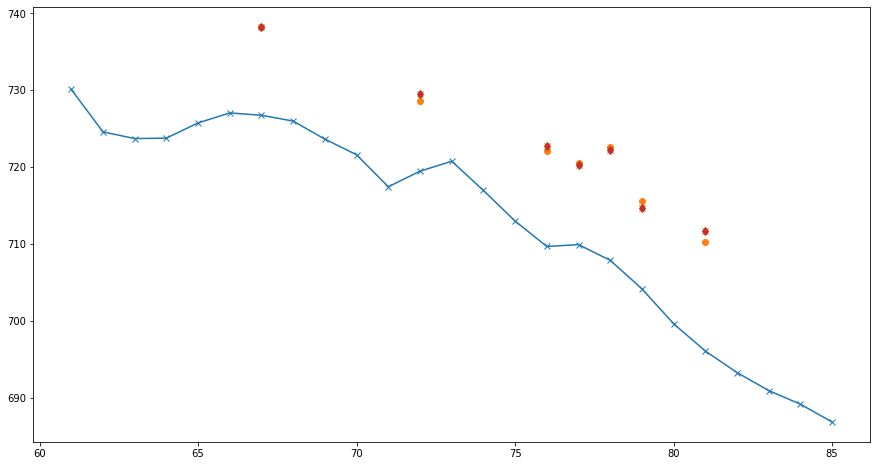

In [89]:
df = pd.read_csv(f'{icesat2_path}/{fname}.csv', parse_dates=True)
df['t_dt'] = pd.to_datetime(dfx.t_dt)
df = df[df.strip=='gt2r']

df.h_te_interp.plot(style='-x')
(df.h_canopy+df.h_te_interp).plot(style='o')
df.h_canopy_abs.plot(style='x')
df.h_max_canopy_abs.plot(style='d')

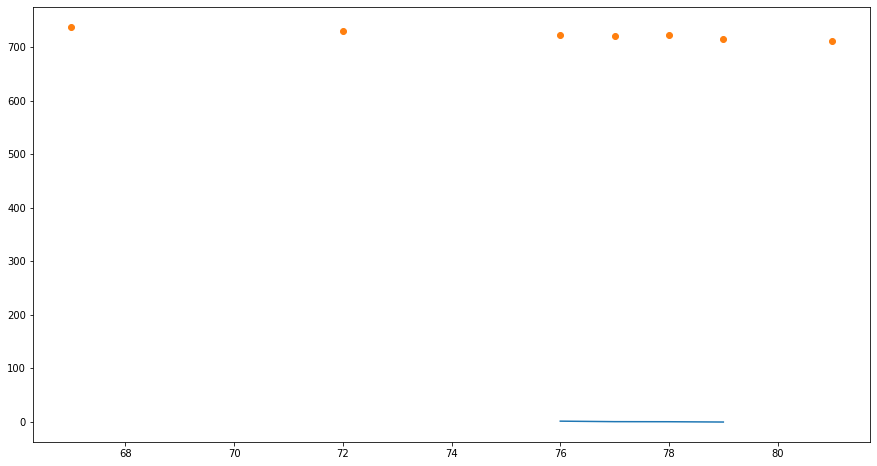

In [90]:
(df.h_canopy_abs - (df.h_canopy+df.h_te_interp)).plot()
df.h_canopy_abs.plot(style='o')

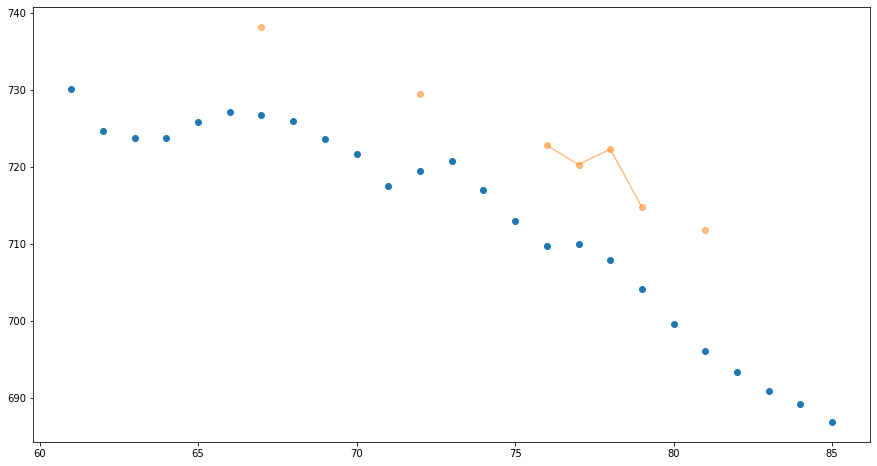

In [91]:
df.h_te_interp.plot(style='o')
df.h_canopy_abs.plot(style='-o', alpha=.5)
